In [51]:
import pandas as pd
df = pd.read_csv('C:/Users/User/Desktop/Titanic-Dataset.csv')
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


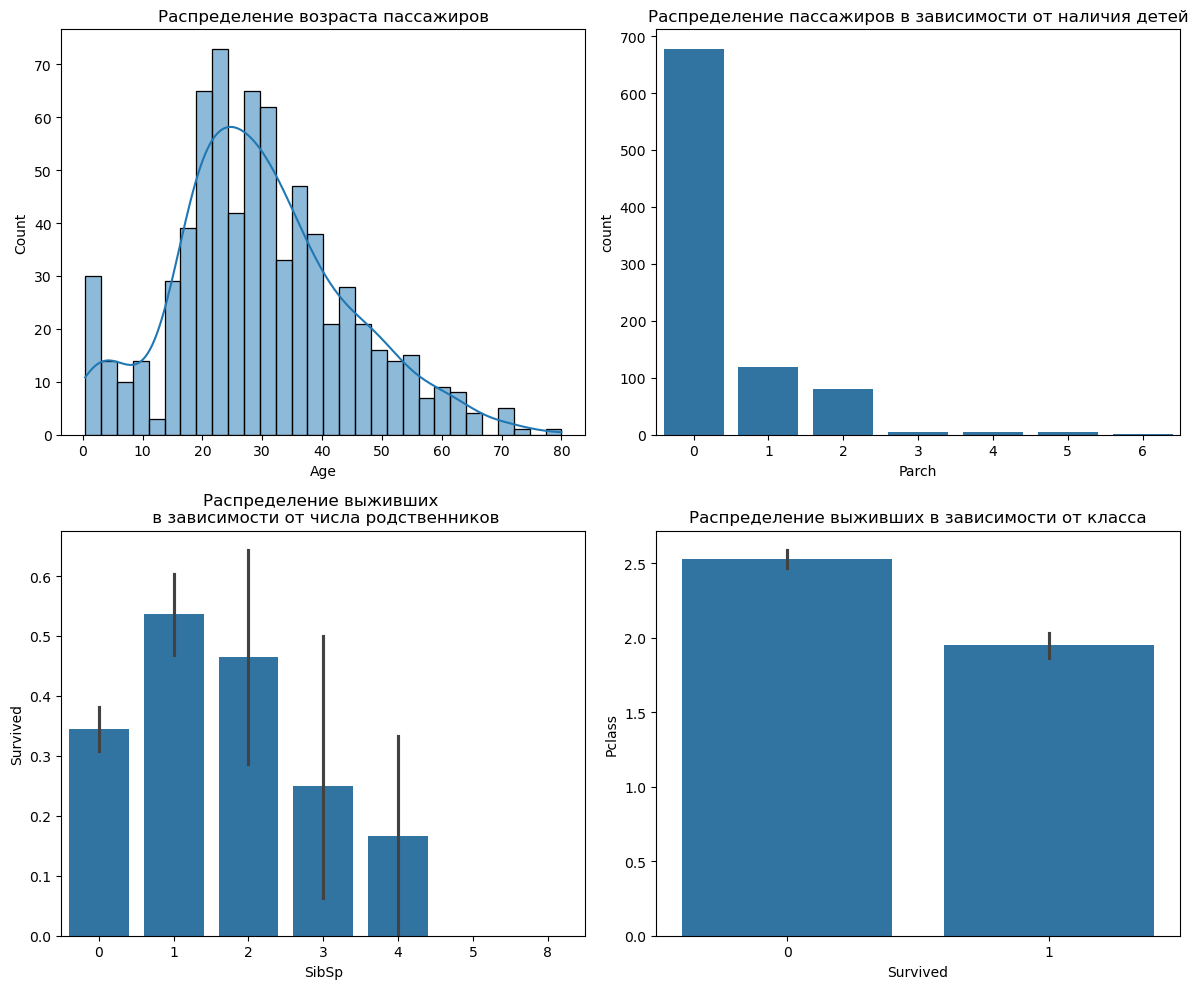

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(data=df, x="Age", kde=True, ax=axes[0,0], bins=30) 
axes[0,0].set_title("Распределение возраста пассажиров")
sns.countplot(data=df, x="Parch", ax=axes[0,1])
axes[0,1].set_title("Распределение пассажиров в зависимости от наличия детей")
sns.barplot(data=df, x="SibSp", y="Survived", estimator="mean", ax=axes[1,0])
axes[1,0].set_title("Распределение выживших \n в зависимости от числа родственников")
sns.barplot(data=df, x="Survived", y = "Pclass", ax=axes[1,1], estimator="mean")
axes[1,1].set_title("Распределение выживших в зависимости от класса")
plt.tight_layout()
plt.show()

In [54]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


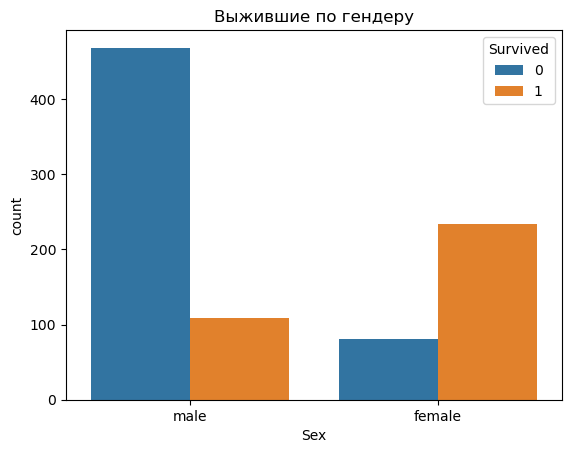

In [55]:
plt.figure()
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Выжившие по гендеру')
plt.show()

In [56]:
df.loc[df.Sex == 'female', 'Sex'] = 1
df.loc[df.Sex == 'male', 'Sex'] = 0

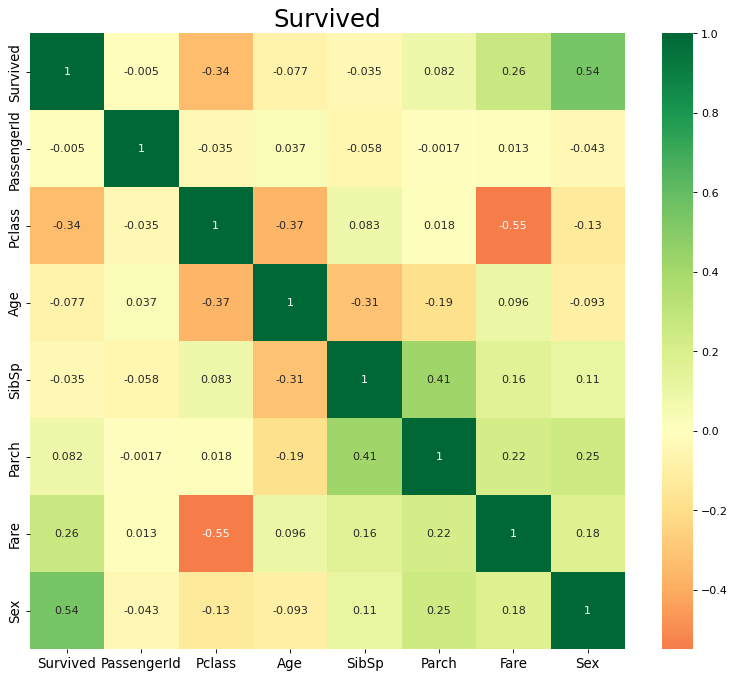

In [57]:
heatdf = df[['Survived', 'PassengerId','Pclass', 'Age','SibSp','Parch','Fare', 'Sex']]

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(heatdf.corr(), xticklabels=heatdf.corr().columns, yticklabels=heatdf.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Survived', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [58]:
df["LastName"] = df["Name"].str.split(",").str[0]
df["FamilySize"] = df["SibSp"] + df["Parch"] 


In [59]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Futrelle,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Allen,0


In [68]:
familiaset = df[(df["FamilySize"] > 1)]
familia = familiaset.groupby("LastName")
for name, group in familia:
    print(f"Семья {name}:")
    print(group[["Name", "Age", "Pclass", "Survived", "Sex"]])
    print("-" * 100)


Семья Abbott:
                                 Name   Age  Pclass  Survived Sex
279  Abbott, Mrs. Stanton (Rosa Hunt)  35.0       3         1   1
746       Abbott, Mr. Rossmore Edward  16.0       3         0   0
----------------------------------------------------------------------------------------------------
Семья Allison:
                                                Name    Age  Pclass  Survived  \
297                     Allison, Miss. Helen Loraine   2.00       1         0   
305                   Allison, Master. Hudson Trevor   0.92       1         1   
498  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  25.00       1         0   

    Sex  
297   1  
305   0  
498   1  
----------------------------------------------------------------------------------------------------
Семья Andersson:
                                                  Name   Age  Pclass  \
13                         Andersson, Mr. Anders Johan  39.0       3   
68                     Andersson, Miss. Erna 

In [72]:
familia_survived = df.groupby("LastName").filter( 
    lambda x: len(x) > 1 and (x["Survived"] == 1).all())
for name, group in familia_survived.groupby("LastName"):
    print(f"Семья {name}:")
    print(group[["Name", "Age", "Sex", "Pclass"]])
    print("-" * 100)


Семья Baclini:
                                      Name    Age Sex  Pclass
448         Baclini, Miss. Marie Catherine   5.00   1       3
469          Baclini, Miss. Helene Barbara   0.75   1       3
644                 Baclini, Miss. Eugenie   0.75   1       3
858  Baclini, Mrs. Solomon (Latifa Qurban)  24.00   1       3
----------------------------------------------------------------------------------------------------
Семья Beane:
                                  Name   Age Sex  Pclass
543                  Beane, Mr. Edward  32.0   0       2
546  Beane, Mrs. Edward (Ethel Clarke)  19.0   1       2
----------------------------------------------------------------------------------------------------
Семья Becker:
                            Name  Age Sex  Pclass
183    Becker, Master. Richard F  1.0   0       2
618  Becker, Miss. Marion Louise  4.0   1       2
----------------------------------------------------------------------------------------------------
Семья Beckwith:
        